### **STEP 1)  Extract Data from Source**

Toggling between two different energy datasets:

**energy_dataset.csv**

Contains 4 years of hourly electrical consumption, generation, pricing, and weather data for Spain. Source: https://www.kaggle.com/nicholasjhana/energy-consumption-generation-prices-and-weather

**PJME_hourly.csv**

Hourly energy consumption data from PJM Interconnection LLC (PJM), a regional transmission organization (RTO) in the US. Source: https://www.kaggle.com/robikscube/hourly-energy-consumption

In [1]:
import pandas as pd
import numpy as np
import dnntime as DT

Imported Deep_Timeseries version: 0.3.2.3. Call by using:
        auto_ts.Auto_Timeseries(trainfile, ts_column,
                            sep=',', target=None, score_type='rmse', forecast_period=2,
                            time_interval='Month', non_seasonal_pdq=None, seasonality=False,
                            seasonal_period=12, seasonal_PDQ=None,
                            verbose=0)
    To get detailed charts of actuals and forecasts, set verbose = 1


In [2]:
datapath = 'example_datasets/'
filename = 'energy_dataset.csv'

ts_column = 'time'
sep = ','
target = 'total load actual'

In [3]:
# datapath = 'example_datasets/'
# filename = 'PJME_hourly.csv'

# ts_column = 'Datetime'
# sep = ','
# target = 'PJME_MW'

In [4]:
from dnntime.utils.etl import load_ts_data

In [5]:
df_energy = load_ts_data(datapath+filename, ts_column)

    - Now loading data from filepath 'example_datasets/energy_dataset.csv' ...
    - File loaded successfully. Shape of dataset = (35064, 28)


### **STEP 2) Preprocessing I (Cleaning)**

The *first* round of data preprocessing and ETL does the following:

*   extract the Spain total electricity demand univarate time-series from this larger data frame
*   confirm its DateTime index to hourly frequency and forwardfill any missing data if needed


In [6]:
df_energy.shape

(35064, 28)

In [7]:
df_energy.dtypes

generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil coal-derived gas             float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation fossil oil shale                    float64
generation fossil peat                         float64
generation geothermal                          float64
generation hydro pumped storage aggregated     float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation marine                              float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation solar                               float64
generation

In [8]:
df_energy.head(5)

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [9]:
df_energy.tail(5)

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,NaN,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,NaN,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,NaN,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,NaN,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89
2018-12-31 23:00:00+01:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,NaN,...,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88


**Initial Data Cleaning**

This preprocesses and cleansthe data in the following order:

    1) Sort DateTimeIndex in ascending order (if unsorted)
    2) Check no duplicate datetime, otherwise keep only first one
    3) Add DateTimeIndex freq if it doesn't exist. This is needed necessary plotting purposes.
    4) If regression, convert target column to float.
    5) If dataset requires only positive numbers, replace all negative numbers with NaN.
    6) Interpolate the missing values with 'linear' as default.

In [10]:
from dnntime.utils.etl import clean_ts_data

In [11]:
freq = 'H'

In [12]:
dfi_energy = clean_ts_data(df_energy, target, as_freq=freq, allow_neg=False)

    - Sorted DateTimeIndex in asc order (just in case).
    - Checked that there are no duplicate times.
    - Added freq 'H' to DateTimeIndex.
    - Since negative values are unpermitted, all negative values found in dataset are converted to NaN.
    - filled any NaN value via linear interpolation.


In [13]:
# newly cleaned and reindexed dataset
dfi_energy.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
2015-01-01 00:00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 01:00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 02:00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 03:00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 04:00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


#### **Create df_energy univarate time-series**

In [14]:
dfi = dfi_energy[[target]]

In DataFrame format:

In [15]:
dfi.head()

,total load actual
2015-01-01 00:00:00,25385.0
2015-01-01 01:00:00,24382.0
2015-01-01 02:00:00,22734.0
2015-01-01 03:00:00,21286.0
2015-01-01 04:00:00,20264.0


In Series format:

In [16]:
dfi[target].head()

2015-01-01 00:00:00    25385.0
2015-01-01 01:00:00    24382.0
2015-01-01 02:00:00    22734.0
2015-01-01 03:00:00    21286.0
2015-01-01 04:00:00    20264.0
Freq: H, Name: total load actual, dtype: float64

### **STEP 3) EDA I (General)**

The *first* round of exploratory data analyses (EDA) does the following:

*   Visualize the **"total load actual"** univarate time-series without any transformations.
*   Zoom into some parts of the time-series.
*   Bucket into histograms.

In [17]:
 from dnntime.utils.eda import time_series_plot, \
                               top_correlation_to_name, test_stationarity

In [18]:
# Define plot labels
# title = "Total Electrity Demand in Spain Time-Series"
title = "PJME Regional Power Demand Time-Series"
x_label = f'Datetime'
y_label = f"Total Demand (MW)"

In [19]:
from dnntime.utils.eda import ts_plot

In [20]:
# ts_plot(dfi, ts_column, target, 
#         title=title, 
#         y_label=y_label
#        )

In [21]:
type(dfi.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [22]:
isinstance(dfi.index, pd.core.indexes.datetimes.DatetimeIndex) 

True

In [23]:
dfi.index.year

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', length=35064)

**Split into sub time-series**

In [24]:
from dnntime.utils.eda import ts_sub_plot

In [25]:
# ts_sub_plot(dfi, ts_column, target, 
#             title=title, 
#             y_label=y_label,
#             split='y',
#             line_width=0.5
#            )

### **STEP 4) EDA II (Time-Series)**

The *second* round of exploratory data analyses (EDA) is more time-series specific, including:

*   Check stationarity to dataset using augmented Dicker-Fuller test
*   Check for trends and seasonsility using ETS Decomposition

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
from dnntime.utils.eda import time_series_plot, top_correlation_to_name, \
                              test_stationarity

**Stationary Test (Dickey-Fuller)**

In [28]:
from dnntime.utils.eda import test_stationarity

In [29]:
test_stationarity(dfi)

modifying time series dataframe into an array to test
 this series is stationary


Test Statistic                   -66.818137
p-value                            0.000000
#Lags Used                         2.000000
Number of Observations Used    35061.000000
Critical Value (1%)               -3.430537
Critical Value (5%)               -2.861622
Critical Value (10%)              -2.566814
dtype: float64

In [30]:
test_stationarity(dfi[target])

 this series is stationary


Test Statistic                   -66.818137
p-value                            0.000000
#Lags Used                         2.000000
Number of Observations Used    35061.000000
Critical Value (1%)               -3.430537
Critical Value (5%)               -2.861622
Critical Value (10%)              -2.566814
dtype: float64

In [31]:
def adf_test(series,title='', alpha=0.05):  # alpha denotes significance level
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= alpha:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

Test stationarity for **df_energy_total**:

In [32]:
# adf_test(dfi[target])

**ETS Decomposition**

In [33]:
from dnntime.utils.eda import ets_decomposition_plot

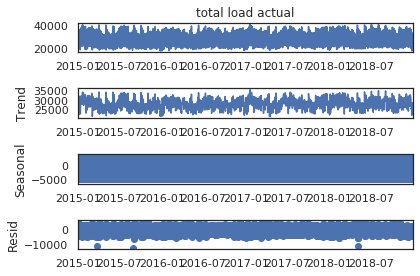

In [34]:
ets = ets_decomposition_plot(dfi, ts_column, target, title, y_label);

In [35]:
# ets_decomposition_plot(dfi, ts_column, target, title, y_label,
#                        prophet=True);

In [36]:
# ets = ets_decomposition_plot(dfi, ts_column, target, title, y_label, 
#                              plotly=True);

**Deseasonalizing**

Types of seasonality:
*  Time of day
*  Daily
*  Weekly
*  Monthly
*  Yearly

Removing seasonality methods:
*  Differencing
*  Power/Log Transformation

In [37]:
pd.plotting.register_matplotlib_converters()
type(ets.trend)

pandas.core.series.Series

In [38]:
# ets.trend.plot();

In [39]:
# ets.trend.diff().plot();

**ACF and PACF**

In [40]:
from dnntime.utils.eda import acf_pacf_plot

In [41]:
title = "Total Electricity Demand"
lags_7 = 24*7  # 7-days lag
lags_30 = 24*30  # 30-days lag
lags_90 = 24*90  # 90-days lag

In [42]:
# acf_pacf_plot(dfi, target, title, lags=[lags_7, lags_30])

**Expotential Smoothing (Holt-Winters)**

In [43]:
'box-cox'.title()

'Box-Cox'

### **STEP 5) Preprocessing II (Transformations)**

Four typical transformation steps:

    1) Box-Cox Power Transform (or log)
    2) Standarize and normalize around mean 0
    3) Deseasonalize
    4) Detrend until stationary

Followed by:

    1) train-test split
    2) to_supervised
    3) transform to mini-batches

**1-2) Log/Power Transform and Standardize**

Options:
*    Log: 'log'
*    Power: 'box-cox' (position values only), 'yeo-johnson' (positive and negaitve values)

In [44]:
from dnntime.utils.etl import log_power_transform

In [45]:
# Performs log or power transform and then normalize in one function
dfi_trans1, _ = log_power_transform(dfi, target, method='box-cox', standardize=True)

In [46]:
dfi.head()

,total load actual
2015-01-01 00:00:00,25385.0
2015-01-01 01:00:00,24382.0
2015-01-01 02:00:00,22734.0
2015-01-01 03:00:00,21286.0
2015-01-01 04:00:00,20264.0


In [47]:
dfi_trans1

,total load actual
2015-01-01 00:00:00,-0.708702
2015-01-01 01:00:00,-0.938863
2015-01-01 02:00:00,-1.324659
2015-01-01 03:00:00,-1.672110
2015-01-01 04:00:00,-1.922532
...,...
2018-12-31 19:00:00,0.449938
2018-12-31 20:00:00,0.253586
2018-12-31 21:00:00,-0.108044
2018-12-31 22:00:00,-0.614214


**2) Deseasonalize and/or Detrend**

Manual customized differencing coming soon...

In [48]:
from dnntime.utils.etl import decompose

In [49]:
dfi_trans2, seasonality = decompose(dfi_trans1, target, type='deseasonalize', model='additive')
dfi_trans2.head()

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


,total load actual
2015-01-01 12:00:00,-1.755847
2015-01-01 13:00:00,-1.531988
2015-01-01 14:00:00,-1.370088
2015-01-01 15:00:00,-1.524664
2015-01-01 16:00:00,-1.578919


**3) Normalize and Standardize** (Optional)

In [50]:
from dnntime.utils.etl import normalize

In [51]:
dfi_trans3, scaler = normalize(dfi_trans2, target)
dfi_trans3.head()

,total load actual
2015-01-01 12:00:00,0.216964
2015-01-01 13:00:00,0.262850
2015-01-01 14:00:00,0.296036
2015-01-01 15:00:00,0.264352
2015-01-01 16:00:00,0.253231


In [52]:
dfi_trans3.min(), dfi_trans3.max()

(total load actual    0.0
 dtype: float64,
 total load actual    1.0
 dtype: float64)

In [53]:
dfi_trans2.min(), dfi_trans2.max()

(total load actual   -2.814324
 dtype: float64,
 total load actual    2.064253
 dtype: float64)

**4) Train test split** (including converting to supervised)

Select n_input, n_output:

**n_output** needs to be specified by business design.

**n_input** can be hyparameter tuned to minimize errors n_output values.

In this example, this is **univariate** time-series measuring enenergy demand on an hourly basis. It is a **multi-step** forecasting of one day ahead, or 24 timesteps with an hour interval each. The model will retrieve 2-weeks of data to make each one-day forecast. The **test set** will be the last month of this dataset and the **training set** will be everything before.

In [54]:
from dnntime.utils.classes import timesteps

In [55]:
#create train, test data
ts = timesteps(freq) # 'H' freq, so each timestep t is 1 hr interval
n_input = ts.BIWK     # let's input the two weeks (24*14 timesteps)
n_output = ts.DAY     # let's forecast the next day (24 timesteps)
# n_output = 1
n_val = ts.BIWK       # validation dataset size
n_test = ts.MONTH     # test dataset size

# Hyperparameters
n_features = 1  # number of feature(s)
n_units = 128   # number of units per layer
d_rate = 0.15   # dropout rate

n_batch = 512  # batch size
n_epoch = 2    # number of epochs

In [56]:
# data = dfi_trans2[target]
data = dfi_trans2[target]['2018']

In [57]:
from dnntime.utils.etl import split_data

In [58]:
data.shape

(8748,)

In [59]:
data = data.to_frame()

In [60]:
n_test, n_val, n_input, n_output

(720, 336, 336, 24)

In [61]:
orig, train, val, test = split_data(data, 
                                    n_test=n_test,  # size of test set
                                    n_val=n_val,  # size of validation set
                                    n_input=n_input,   # input timestep seq
                                    n_output=n_output, # output timestep seq
                                    g_min=0,     # min gap ratio
                                    g_max=0.01)  # max gap ratio

In [62]:
X, y, t = orig  # original data tuple in supervised format
X_train, y_train, t_train = train
X_val, y_val, t_val = val
X_test, y_test, t_test = test

In [63]:
print(f"data.shape = ", data.shape)
print("X.shape = ", X.shape)
print("y.shape = ", y.shape)
print("t.shape = ", t.shape)
print("X_train.shape = ", X_train.shape)
print("y_train.shape = ", y_train.shape)
print("t_train.shape = ", t_train.shape)
print("X_val.shape = ", X_val.shape)
print("y_val.shape = ", y_val.shape)
print("t_val.shape = ", t_val.shape)
print("X_test.shape = ", X_test.shape)
print("y_test.shape = ", y_test.shape)
print("t_test.shape = ", t_test.shape)

train_prct = round(len(X_train)/len(X)*100, 2)
val_prct = round(len(X_val)/len(X)*100, 2)
test_prct = round(len(X_test)/len(X)*100, 2)
gap_prct = round(100-train_prct-val_prct-test_prct, 2)
print("\nSplit %:")
print(f"Train: {train_prct}%, Val: {val_prct}%, Test: {test_prct}%, Gap: {gap_prct}%")

data.shape =  (8748, 1)
X.shape =  (8389, 336, 1)
y.shape =  (8389, 24)
t.shape =  (8389,)
X_train.shape =  (7329, 336, 1)
y_train.shape =  (7329, 24)
t_train.shape =  (7329,)
X_val.shape =  (336, 336, 1)
y_val.shape =  (336, 24)
t_val.shape =  (336,)
X_test.shape =  (720, 336, 1)
y_test.shape =  (720, 24)
t_test.shape =  (720,)

Split %:
Train: 87.36%, Val: 4.01%, Test: 8.58%, Gap: 0.05%


Integration with KFold CV with "gaps" coming soon...

In [64]:
# from random import randint
# from tscv import GapKFold

# gap2 = randint(0, int(0.001*len(X_train)))
# gap2

# n_split=5

# tscv = GapKFold(n_splits=n_split, gap_before=gap2, gap_after=gap2)

# from sklearn.model_selection import cross_val_score

# X_train.shape
# X_train2 = X_train.reshape(X_train.shape[0], X_train.shape[1])
# X_train2.shape

# for train, val in tscv.split(X_train2):
#     print(train.shape)
#     print(val.shape)
# for train, val in tscv.split(X_train, y_train, t_train):
#     print(train)
#     print(val.shape)

# cv = GapLeavePOut(p=1, gap_before=1, gap_after=2)

# train, test = cv.split(data)

### **STEP 6) Model Search (Statistical)**

### **STEP 7) Model Search (NN)**

Running following deep learning models:

    1) RNN
    2) LSTM
    3) GRU
    4) ConvLSTM
    5) ConvGRU (coming soon)
    6) TDNN (coming soon)
    6) TCN (coming soon)
    7) LSTM Autoencoder (coming later)
    8) Amazon's DeepAR (coming later)
    9) Microsoft’s ForecastTCN (coming later)
    10) Multi-scale Hierarchical LSTMs (coming later)
    11) Customize your own (coming later)

#### 7.0) Import the necessary environments:

In [65]:
import os
os.environ["CUDA_DEVICE_ORDER"] ='0'

In [66]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [67]:
# Check is GPU is available
tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [68]:
session = tf.compat.v1.Session()

if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()

Close interactive session


In [69]:
# from tensorflow.keras import backend as K
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Conv1D, Conv2D, ConvLSTM2D, \
#                                     Dense, Flatten, Dropout, MaxPooling1D, MaxPooling2D, \
#                                     RepeatVector, TimeDistributed
# If using tensorflow-gpu
# from keras.layers import CuDNNLSTM, CuDNNGRU
# from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, \
#                             mean_squared_log_error as msle, r2_score as r2

In [70]:
from dnntime.models import build_rnn_model, build_lstm_model, \
                           build_gru_model, build_convlstm_model
from collections import defaultdict

**ml_dict**: a nested dict that stores all of the models and their results

In [71]:
mldict = lambda: defaultdict(mldict)
ml_dict = mldict()

In [72]:
ml_dict.keys()

dict_keys([])

#### **7.1) RNN**

Run a 3-layer stacked RNN model with metric evaluation:

In [73]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, n_input, n_output

((7329, 336, 1), (7329, 24), (336, 336, 1), (336, 24), 336, 24)

In [74]:
model, pred, rmse, norm_rmse = build_rnn_model(X_train, y_train, X_val, y_val,
                                               n_input, n_output,
                                               n_units=n_units,
                                               d_rate=d_rate,
                                               n_epoch=n_epoch,
                                               n_batch=n_batch)

Stacked RNN model summary:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 336, 128)          16640     
_________________________________________________________________
dropout (Dropout)            (None, 336, 128)          0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 336, 128)          32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 336, 128)          0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                

In [75]:
name = 'RNN'
ml_dict[name]['model'] = model
ml_dict[name]['forecast'] = pred
ml_dict[name]['rmse'] = rmse
ml_dict[name]['norm_rmse'] = norm_rmse

#### **7.2) LSTM**

Run a 3-layer stacked RNN model with metric evaluation:

In [ ]:
model, pred, rmse, norm_rmse = build_lstm_model(X_train, y_train, X_val, y_val,
                                                n_input, n_output,
                                                n_units=n_units,
                                                d_rate=d_rate,
                                                n_epoch=n_epoch,
                                                n_batch=n_batch)

Stacked LSTM model summary:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 336, 128)          66560     
_________________________________________________________________
dropout_3 (Dropout)          (None, 336, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 336, 128)          131584    
_________________________________________________________________
dropout_4 (Dropout)          (None, 336, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)           

In [ ]:
name = 'LSTM'
ml_dict[name]['model'] = model
ml_dict[name]['forecast'] = pred
ml_dict[name]['rmse'] = rmse
ml_dict[name]['norm_rmse'] = norm_rmse

#### **7.3) GRU**

Run a 3-layer stacked GRU model with metric evaluation:

In [ ]:
model, pred, rmse, norm_rmse = build_gru_model(X_train, y_train, X_val, y_val,
                                               n_input, n_output,
                                               n_units=n_units,
                                               d_rate=d_rate,
                                               n_epoch=n_epoch,
                                               n_batch=n_batch)

In [ ]:
name = 'GRU'
ml_dict[name]['model'] = model
ml_dict[name]['forecast'] = pred
ml_dict[name]['rmse'] = rmse
ml_dict[name]['norm_rmse'] = norm_rmse

#### **7.4) ConvLSTM**

Run a 3-layer stacked LSTM model with metric evaluation:

In [ ]:
model, pred, rmse, norm_rmse = build_convlstm_model(X_train, y_train, X_val, y_val,
                                                    l_subseq=n_output, # length of subsequence
                                                    n_col=n_output,    # length of "image" col
                                                    n_units=n_units,
                                                    d_rate=d_rate,
                                                    n_epoch=n_epoch,
                                                    n_batch=n_batch)

In [ ]:
name = 'ConvLSTM'
ml_dict[name]['model'] = model
ml_dict[name]['forecast'] = pred
ml_dict[name]['rmse'] = rmse
ml_dict[name]['norm_rmse'] = norm_rmse

#### **7.x) Sort ml_dict based on RMSE and select top model**

In [ ]:
from dnntime.utils.classes import colorful
import operator

score_type = 'rmse'

In [ ]:
f1_stats = {}
for key, val in ml_dict.items():
    f1_stats[key] = ml_dict[key][score_type]
best_model_name = min(f1_stats.items(), key=operator.itemgetter(1))[0]

In [ ]:
print(colorful.BOLD + '\nBest Model is:' + colorful.END)
print('    %s' % best_model_name)
best_model = ml_dict[best_model_name]['model']
# print('    Best Model Forecasts: %s' %ml_dict[best_model_name]['forecast'])
print('    Best Model Score: %0.2f' % ml_dict[best_model_name][score_type])

### **STEP 8) Best Model Train, Test, and Forecast**

Retrain model with training data, but this training data is combined PREVIOUS training data + PREVIOUS validation data. Test data will be untouched.

In [ ]:
orig, train, test = split_data(data, 
                               n_test=n_test,  # size of test set
                               n_val=0,  # 0 signifies no val set
                               n_input=n_input,   # input timestep seq
                               n_output=n_output, # output timestep seq
                               g_min=0,     # min gap ratio
                               g_max=0.01)  # max gap ratio

In [ ]:
X, y, t = orig  # original data tuple in supervised format
X_train, y_train, t_train = train
X_test, y_test, t_test = test

In [ ]:
print(f"data.shape = ", data.shape)
print("X.shape = ", X.shape)
print("y.shape = ", y.shape)
print("t.shape = ", t.shape)
print("X_train.shape = ", X_train.shape)
print("y_train.shape = ", y_train.shape)
print("t_train.shape = ", t_train.shape)
print("X_test.shape = ", X_test.shape)
print("y_test.shape = ", y_test.shape)
print("t_test.shape = ", t_test.shape)

train_prct = round(len(X_train)/len(X)*100, 2)
test_prct = round(len(X_test)/len(X)*100, 2)
gap_prct = round(100-train_prct-val_prct-test_prct, 2)
print("\nSplit %:")
print(f"Train: {train_prct}%, Test: {test_prct}%, Gap: {gap_prct}%")

Fit the best model.

In [ ]:
best_model.fit(X_train, y_train, epochs=n_epoch, batch_size=n_batch)

Predict the best model.

In [ ]:
X_pred = best_model.predict(X_test)

Find and print out the errors.

In [ ]:
from dnntime.utils import print_dynamic_rmse, print_mae, print_mape

In [ ]:
rmse, norm_rmse = print_dynamic_rmse(y_test, X_pred, y_train)
mae = print_mae(y_test, X_pred)
mape = print_mape(y_test, X_pred)

In [ ]:
print("-----------------------------------------------------------------")
print("BEST MODEL SUMMARY:")
print("-----------------------------------------------------------------")
print(f"MAE Score: {round(mae, 4)}")
print(f"MAPE Score: {round(mape, 4)}")
print(f"RMSE Score: {round(rmse, 4)}")
print(f"Normalized RMSE Score: {round(norm_rmse, 2)*100}%")

Convert prediction (X_pred) and actual (y_test) back to original.

In [ ]:
y_test.shape, t_test.shape

In [ ]:
header = ["t"]
for i in range(1, n_output):
    header.append(f"t + {i}")

header

In [ ]:
df_act = pd.DataFrame(y_test, index=t_test, columns=header)
df_act

In [ ]:
df_pred = pd.DataFrame(X_pred, index=t_test, columns=header)
df_pred

In [ ]:
seasonality['2018']

In [ ]:
data

In [ ]:
_, _, test_season = split_data(seasonality['2018'], 
                               n_test=n_test,  # size of test set
                               n_val=0,  # 0 signifies no val set
                               n_input=n_input,   # input timestep seq
                               n_output=n_output, # output timestep seq
                               g_min=0,     # min gap ratio
                               g_max=0.01)  # max gap ratio

X_season, y_season, t_season = test_season

In [ ]:
df_season = pd.DataFrame(y_season, index=t_season, columns=header)
df_season

Adding back seasonality:

In [ ]:
df_pred += df_season
df_act += df_season

In [ ]:
df_act

Perform inverse Box-Cox:

In [ ]:
from scipy.special import boxcox, inv_boxcox

Ultimately, the goal is for ALL of the following to be able to run with a single function **DNN_TimeSeries**.